# Salary Dataset

In [1]:
#importing Librabies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
#loading dataset with pandas libraries
df=pd.read_csv(r"C:\Users\RBC\Desktop\ML_projects\Linear_regresation\Salary_dataset.csv")

In [3]:
#first five dataset
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
#unnamed column have to remove for better work and prediction

In [6]:
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
#Checking null value 
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Exploratory Data Analysis

In [9]:
#Shape of dataset
df.shape

(30, 2)

In [10]:
#Description of dataset
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [11]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=30, step=1)

In [13]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## Slicing dataset in x and y

In [14]:
X=df[['YearsExperience']]
y=df['Salary']

## Spliting data in Train and test

In [15]:
#Splitting data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=0)

In [16]:
X_train.shape

(6, 1)

In [17]:
X_test.shape

(24, 1)

In [18]:
y_train.shape

(6,)

In [19]:
y_test.shape

(24,)

## Model fitting

In [20]:
#Modeling traning with linerregresation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [21]:
#intercept
print("Intercept= ",lr.intercept_)
print("coefficient= ",lr.coef_)

Intercept=  24913.595995114192
coefficient=  [9133.88237036]


In [22]:
#prediction
y_predict=lr.predict(X_test)
y_predict

array([ 39527.80778769, 119905.97264685,  63275.90195062,  61449.12547655,
       112598.86675056, 105291.76085428, 113512.2549876 ,  62362.51371359,
        74236.56079505,  97984.65495799,  52315.24310619,  72409.78432098,
        55055.4078173 ,  66929.45489877, 100724.8196691 ,  87937.38435059,
        37701.03131362, 121732.74912092,  53228.63134323,  45921.52544694,
        79716.89021727,  80630.27845431,  59622.34900248,  55055.4078173 ])

In [23]:
y_test

2      37732.0
28    122392.0
13     57082.0
10     63219.0
26    116970.0
24    109432.0
27    112636.0
11     55795.0
17     83089.0
22    101303.0
5      56643.0
16     66030.0
8      64446.0
14     61112.0
23    113813.0
20     91739.0
1      46206.0
29    121873.0
6      60151.0
4      39892.0
18     81364.0
19     93941.0
9      57190.0
7      54446.0
Name: Salary, dtype: float64

## Visualization of prediction

<Figure size 2160x1080 with 0 Axes>

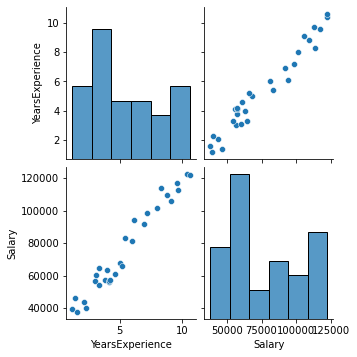

In [24]:
plt.figure(figsize=(30,15))
sns.pairplot(df)
plt.show()

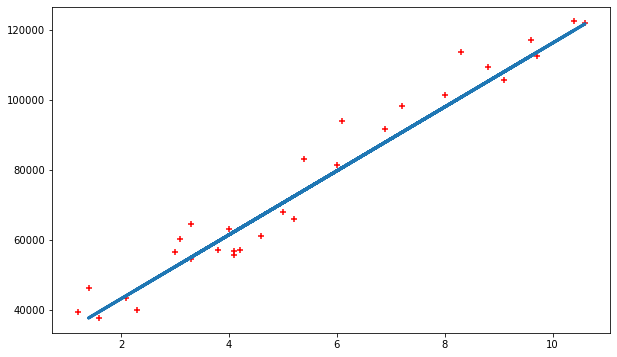

In [25]:
#plotting linear regresation line
plt.figure(figsize=(10,6))
plt.scatter(X,y,color="r",marker="+")
plt.plot(X_test,y_predict,linewidth=3)

In [26]:
#mean Absolute_error,Mean Squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score,r2_score,accuracy_score
print("Mean absolute_error",mean_absolute_error(y_test,y_predict))
print("Mean squared_error",mean_squared_error(y_test,y_predict))

Mean absolute_error 5115.567627173011
Mean squared_error 38768419.01230937


In [27]:
#Root mean square_error
print("Root mean squareed_error",np.sqrt(mean_squared_error(y_test,y_predict)))

Root mean squareed_error 6226.4290739001735


In [28]:
print("R-squared value of predictions:",r2_score(y_test,y_predict))

R-squared value of predictions: 0.9468786210724935


In [29]:
errors=(y_test[::]-y_predict[::])
errors

2     -1795.807788
28     2486.027353
13    -6193.901951
10     1769.874523
26     4371.133249
24     4140.239146
27     -876.254988
11    -6567.513714
17     8852.439205
22     3318.345042
5      4327.756894
16    -6379.784321
8      9390.592183
14    -5817.454899
23    13088.180331
20     3801.615649
1      8504.968686
29      140.250879
6      6922.368657
4     -6029.525447
18     1647.109783
19    13310.721546
9     -2432.349002
7      -609.407817
Name: Salary, dtype: float64

In [30]:
#Checking actual value and prediction
df_check=pd.DataFrame(({'Actual': y_test[:].values, 'Predicted': y_predict[:].ravel(), "Error":errors}))

In [31]:
df_check

,Actual,Predicted,Error
2,37732.0,39527.807788,-1795.807788
28,122392.0,119905.972647,2486.027353
13,57082.0,63275.901951,-6193.901951
10,63219.0,61449.125477,1769.874523
26,116970.0,112598.866751,4371.133249
24,109432.0,105291.760854,4140.239146
27,112636.0,113512.254988,-876.254988
11,55795.0,62362.513714,-6567.513714
17,83089.0,74236.560795,8852.439205
22,101303.0,97984.654958,3318.345042


Text(16.424999999999997, 0.5, 'count')

<Figure size 720x432 with 0 Axes>

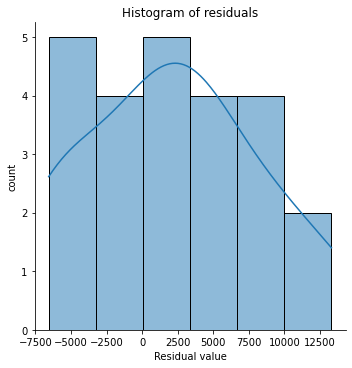

In [32]:
plt.figure(figsize=(10,6))
sns.displot(errors,kde=True)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')


In [33]:
#we can see the difference between actual value and predicted value


## Overall result

In [34]:
print("Intercept= ",lr.intercept_)
print("coefficient= ",lr.coef_)
print("Mean absolute_error",mean_absolute_error(y_test,y_predict))
print("Mean squared_error",mean_squared_error(y_test,y_predict))
print("Root mean squareed_error",np.sqrt(mean_squared_error(y_test,y_predict)))
print("R-squared value of predictions:",r2_score(y_test,y_predict))

Intercept=  24913.595995114192
coefficient=  [9133.88237036]
Mean absolute_error 5115.567627173011
Mean squared_error 38768419.01230937
Root mean squareed_error 6226.4290739001735
R-squared value of predictions: 0.9468786210724935


# Thank you